# Geophysics 3 Group Project
## Flow over hills

Topography files `hill.txt` and `ridge.txt` are preloaded in this folder. Each contains a 512x512 grid of point elevations given by
$$
z_{ij}=\frac{100}{1 + (r_{ij}/50)^2}
$$
with $r_{ij} = |i|$ for a ridge or $r_{ij} = \sqrt{i^2 + j^2}$ for a hill (-256 $<i,j<$ 255).

Run the next cell to set parameters for the linear wind model:

In [2]:
# Parameters
topo_file = 'NorthBerwickLawBlend.txt'       # Topography file name
dx = 25                     # Grid spacing (m)
L  = 500.                   # Horizontal length scale (m)
z0 = 0.01                    # Surface roughness length (m)
zu = 2.                      # Wind measurement height (m)

Run the next cell for a simulation with 1 m s$^{-1}$ wind from the west:

In [3]:
"""
Linear model for turbulent flow over low hills derived
from Jackson and Hunt (1975), Mason and Sykes (1979)
"""
import numpy as np
from scipy.fftpack import fft2,fftshift,ifft2,ifftshift
from scipy.special import kv

# Iteration to find the inner region thickness l (m)
l = (z0/8)*(L/z0)**0.9
for i in range(10):
    l = 2*0.16*L/np.log(l/z0)
a = (np.log(L/z0))**2/(np.log(l/z0)*np.log(zu/z0))

# Read the topography file, find size and take a Fourier transform
z = np.loadtxt(topo_file)
n = z.shape[0]
Fz = fft2(z)
Fz = fftshift(Fz)

# Wavenumbers and modified Bessel functions
k = (2*np.pi/(n*dx))*np.arange(-n/2,n/2)       
m = (2*np.pi/(n*dx))*np.arange(-n/2,n/2)
bu = 1 - kv(0,2*np.sqrt(1j*L*k*zu/l))/kv(0,2*np.sqrt(1j*L*k*z0/l))
bv = 1 - kv(0,2*np.sqrt(2*1j*L*k*zu/l))/kv(0,2*np.sqrt(2*1j*L*k*z0/l))
bu[int(n/2)] = 0
bv[int(n/2)] = 0

# Fourier components of u and v
Fu = np.zeros_like(Fz)
Fv = np.zeros_like(Fz)
for i in range(n):
    for j in range(n):
        r = np.sqrt(k[j]**2 + m[i]**2)
        if r != 0:
            Fu[i,j] = a*bu[j]*(k[j]**2/r)*Fz[i,j]
            Fv[i,j] = a*bv[j]*(k[j]*m[i]/r)*Fz[i,j]

# Inverse Fourier transform
Fu = ifftshift(Fu)
Fv = ifftshift(Fv)
u = 1 + np.real(ifft2(Fu))
v = np.real(ifft2(Fv))
wind = np.sqrt(u**2 + v**2)

<ipython-input-3-f9d196dd2928>:24: RuntimeWarning: invalid value encountered in true_divide
  bu = 1 - kv(0,2*np.sqrt(1j*L*k*zu/l))/kv(0,2*np.sqrt(1j*L*k*z0/l))
<ipython-input-3-f9d196dd2928>:25: RuntimeWarning: invalid value encountered in true_divide
  bv = 1 - kv(0,2*np.sqrt(2*1j*L*k*zu/l))/kv(0,2*np.sqrt(2*1j*L*k*z0/l))


Run the next cell for a basic visualization of the wind field:

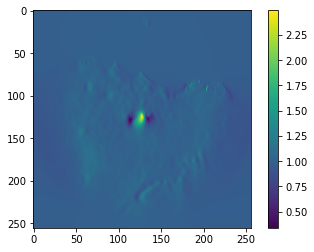

In [4]:
import matplotlib.pyplot as plt
plt.imshow(wind)
plt.colorbar()

Here are some things you could try:

Plot wind speed `wind[256,:]` over the top of the hill and compare it with wind speed over the ridge.

Plot the wind field over the hill as vectors or streamlines.

https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/quiver_simple_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-simple-demo-py

https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/plot_streamplot.html#sphx-glr-gallery-images-contours-and-fields-plot-streamplot-py

Plot the topography as a contour map, a shaded relief map or a surface.

https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py

https://matplotlib.org/examples/pylab_examples/shading_example.html

https://matplotlib.org/examples/mplot3d/surface3d_demo.html

In [6]:
u.shape

(256, 256)

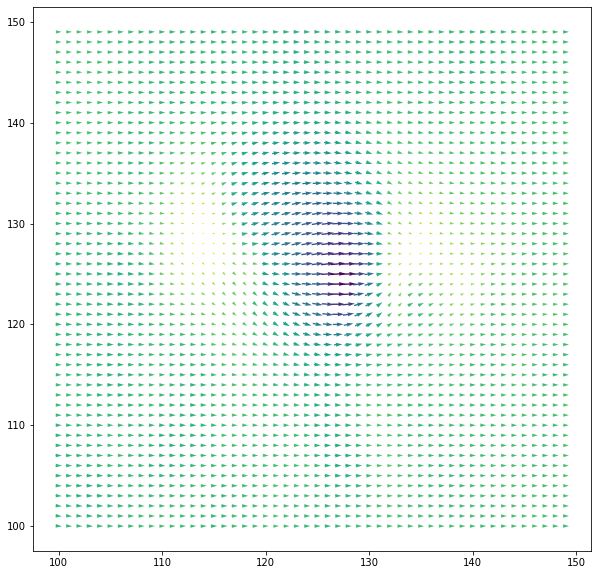

In [15]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(0, 256)
Y = np.arange(0, 256)

fig, ax = plt.subplots(figsize=(10,10))
q = ax.quiver(X[100:150], Y[100:150], u[100:150, 100:150], v[100:150, 100:150], wind[100:150, 100:150], cmap='viridis_r', pivot='mid', units='inches')

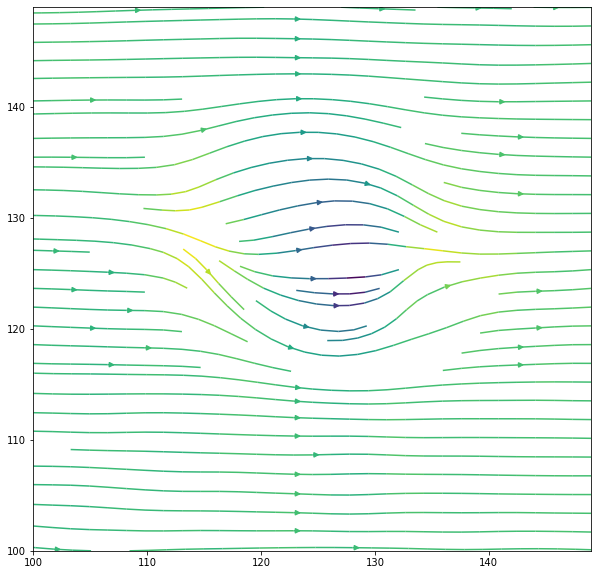

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax.streamplot(X[100:150], Y[100:150], u[100:150, 100:150], v[100:150, 100:150], color=wind[100:150, 100:150], cmap='viridis_r')

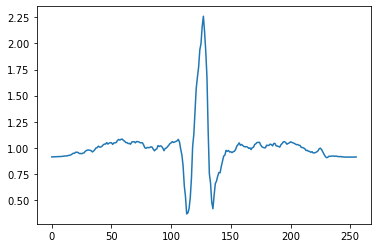

In [18]:
plt.plot(wind[128,:])

In [ ]:
# cut through hill so plot horizontal and vertical wind vectors in the lee of the hill